<a href="https://colab.research.google.com/github/Emmaculate2020/WK9-IP-KNN-Naive-Bayes-Classifier/blob/master/WK9_Python_Programming_The_Naive_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Programming: Naive Bayes 

## 1. Defining the Question

### a) Specifying the Data Analytic Question
> We are going to use the spambase dataset to predict whether an email is a spam or not.

### b) Defining the Metric for Success
> Using different independent features, we are going to predict whether an email is a spam or not.

### d) Recording the Experimental Design
> 1. Reading the data
> 2. Checking the data
> 3. Tidying the data
> 4. Exploratory Analysis
> 5. Implementing the solution
> 6. Challenging the solution
> 7. Follow up questions

### e) Data Relevance
> The data was relevant for our analysis and was obtained from this link;
> https://archive.ics.uci.edu/ml/datasets/Spambase

> We got column possible colum descriptions from this link;
https://www.kaggle.com/monizearabadgi/spambase

> The description of the columns have not been provided though we assumed and used the last column as the status column, 0 for spam and 1 for not spam.

## 2. Reading the Data

In [71]:
# Loading necessary libraries
#
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [72]:
# Loading the Data 
# 

data = pd.read_csv("spambase.data")
data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [73]:
data.shape

(4600, 58)

In [74]:
data['1'].unique()

array([1, 0])

In [75]:
names = pd.read_fwf("spambase.names")
names

,| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
0,|
1,"| 48 continuous real [0,100] attributes of typ..."
2,| = percentage of words in the e-mail that mat...
3,| i.e. 100 * (number of times the WORD appears...
4,"| total number of words in e-mail. A ""word"" i..."
...,...
81,char_freq_$: continuous.
82,char_freq_#: continuous.
83,capital_run_length_average: continuous.
84,capital_run_length_longest: continuous.


In [76]:
names.shape

(86, 1)

In [77]:
doc = pd.read_fwf("spambase.DOCUMENTATION")
doc

,1. Title: SPAM E-mail Database
0,2. Sources:
1,"(a) Creators: Mark Hopkins, Erik Reeber, Georg..."
2,"Hewlett-Packard Labs, 1501 Page Mill Rd., Palo..."
3,(b) Donor: George Forman (gforman at nospam hp...
4,(c) Generated: June-July 1999
...,...
116,56 1 9989 52.173 194.89 374
117,57 1 15841 283.29 606.35 214
118,58 0 1 0.39404 0.4887 124
119,This file: 'spambase.DOCUMENTATION' at the UCI...




## 3. Checking the Data

In [78]:
# Determining the no. of records in our dataset
#

data.shape

# Our data has 4600 rows and 58 columns

(4600, 58)

In [79]:
# Previewing the top of our dataset
#

data.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [80]:
# Previewing the bottom of our dataset
# 

data.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [81]:
# Checking whether each column has an appropriate datatype
#

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4600 non-null   float64
 1   0.64    4600 non-null   float64
 2   0.64.1  4600 non-null   float64
 3   0.1     4600 non-null   float64
 4   0.32    4600 non-null   float64
 5   0.2     4600 non-null   float64
 6   0.3     4600 non-null   float64
 7   0.4     4600 non-null   float64
 8   0.5     4600 non-null   float64
 9   0.6     4600 non-null   float64
 10  0.7     4600 non-null   float64
 11  0.64.2  4600 non-null   float64
 12  0.8     4600 non-null   float64
 13  0.9     4600 non-null   float64
 14  0.10    4600 non-null   float64
 15  0.32.1  4600 non-null   float64
 16  0.11    4600 non-null   float64
 17  1.29    4600 non-null   float64
 18  1.93    4600 non-null   float64
 19  0.12    4600 non-null   float64
 20  0.96    4600 non-null   float64
 21  0.13    4600 non-null   float64
 22  

## 4. External Data Source Validation

### a.Validation

## 5. Tidying the Dataset

In [82]:
data.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

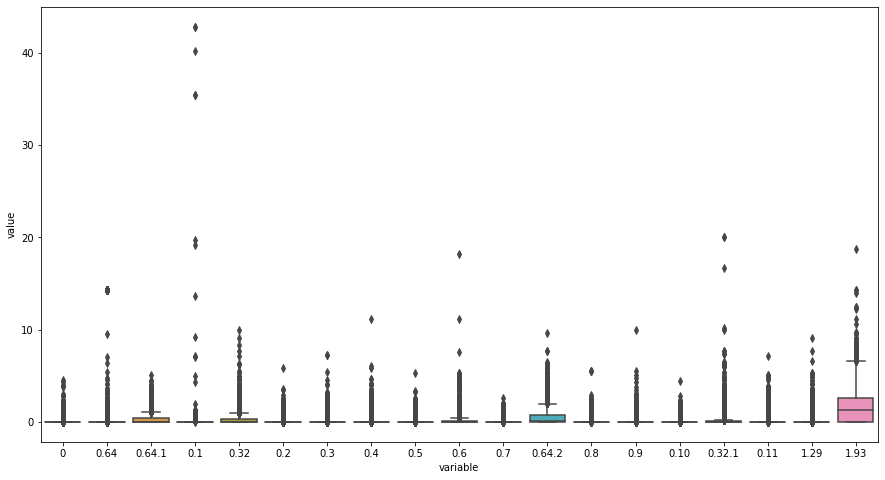

In [83]:
# Checking for outliers
# 

import matplotlib.pyplot as plt
import seaborn as sns

df = data[['0', '0.64','0.64.1','0.1','0.32','0.2','0.3','0.4','0.5','0.6','0.7', 
           '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93']]

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

# We checked outliers for the first 19 columns

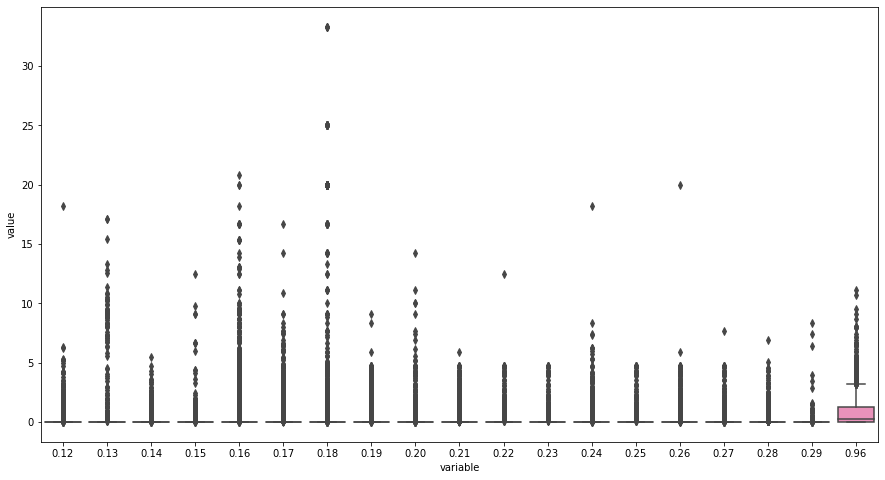

In [84]:
# Checking for outliers from column 20 to 38
#

df = data[['0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28','0.29']]

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

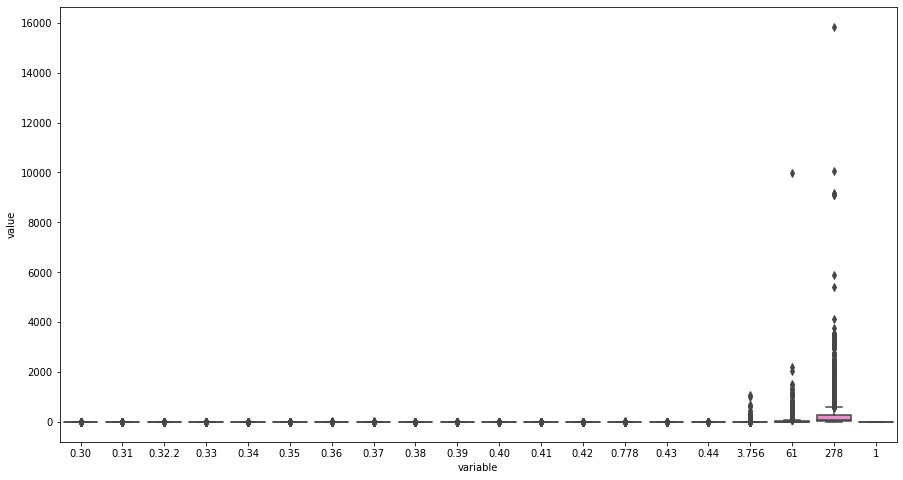

In [85]:
# Checking for outliers from column 38 to
#

df = data[['0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1']]

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

In [86]:
# Checking for Anomalies
# Using Z score
#
import math

outliers = []
def detect_outliers(data):

  threshold = 3
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i - mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(y)
  return outliers



In [87]:
# Checking for Anomalies
# Using Z score
#
columns = data[['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278','1']]

from scipy import stats
z = np.abs(stats.zscore(columns))
print(z)

[[0.34525183 0.0519761  0.43526125 ... 0.2505455  1.22818869 1.2404158 ]
 [0.14598183 0.16498401 0.85183283 ... 2.22087495 3.25837649 1.2404158 ]
 [0.34247529 0.16498401 0.55657586 ... 0.06244954 0.15220708 1.2404158 ]
 ...
 [0.63999202 0.16498401 0.0385264  ... 0.23690579 0.27260002 0.80618128]
 [2.80142011 0.16498401 0.55657586 ... 0.24203686 0.33856875 0.80618128]
 [0.34247529 0.16498401 0.73281238 ... 0.24203686 0.40123905 0.80618128]]


In [88]:
# Dropping and Confirming that our outliers have been dropped from the dataset.
#
new_df= columns[(z < 3).all(axis=1)]
print(f"Previous dataframe size : {columns.shape[0]}")
print(f"New dataframe size: {new_df.shape[0]}")

Previous dataframe size : 4600
New dataframe size: 2184


In [89]:
new_df["1"].unique()

array([1, 0])

In [90]:
# Identifying the Missing Data
#

new_df.isnull().sum()

# Our data do not have null values

0         0
0.64      0
0.64.1    0
0.1       0
0.32      0
0.2       0
0.3       0
0.4       0
0.5       0
0.6       0
0.7       0
0.64.2    0
0.8       0
0.9       0
0.10      0
0.32.1    0
0.11      0
1.29      0
1.93      0
0.12      0
0.96      0
0.13      0
0.14      0
0.15      0
0.16      0
0.17      0
0.18      0
0.19      0
0.20      0
0.21      0
0.22      0
0.23      0
0.24      0
0.25      0
0.26      0
0.27      0
0.28      0
0.29      0
0.30      0
0.31      0
0.32.2    0
0.33      0
0.34      0
0.35      0
0.36      0
0.37      0
0.38      0
0.39      0
0.40      0
0.41      0
0.42      0
0.778     0
0.43      0
0.44      0
3.756     0
61        0
278       0
1         0
dtype: int64

In [91]:
new_df.shape

(2184, 58)

In [92]:
# More data cleaning procedures
# checking for duplicates

new_df.duplicated().value_counts()

# True means we have duplicated values which we need to drop


False    2051
True      133
dtype: int64

In [94]:
# Dropping duplicates
#
new_df = data.drop_duplicates()

#new_df.shape

## 6. Exploratory Analysis

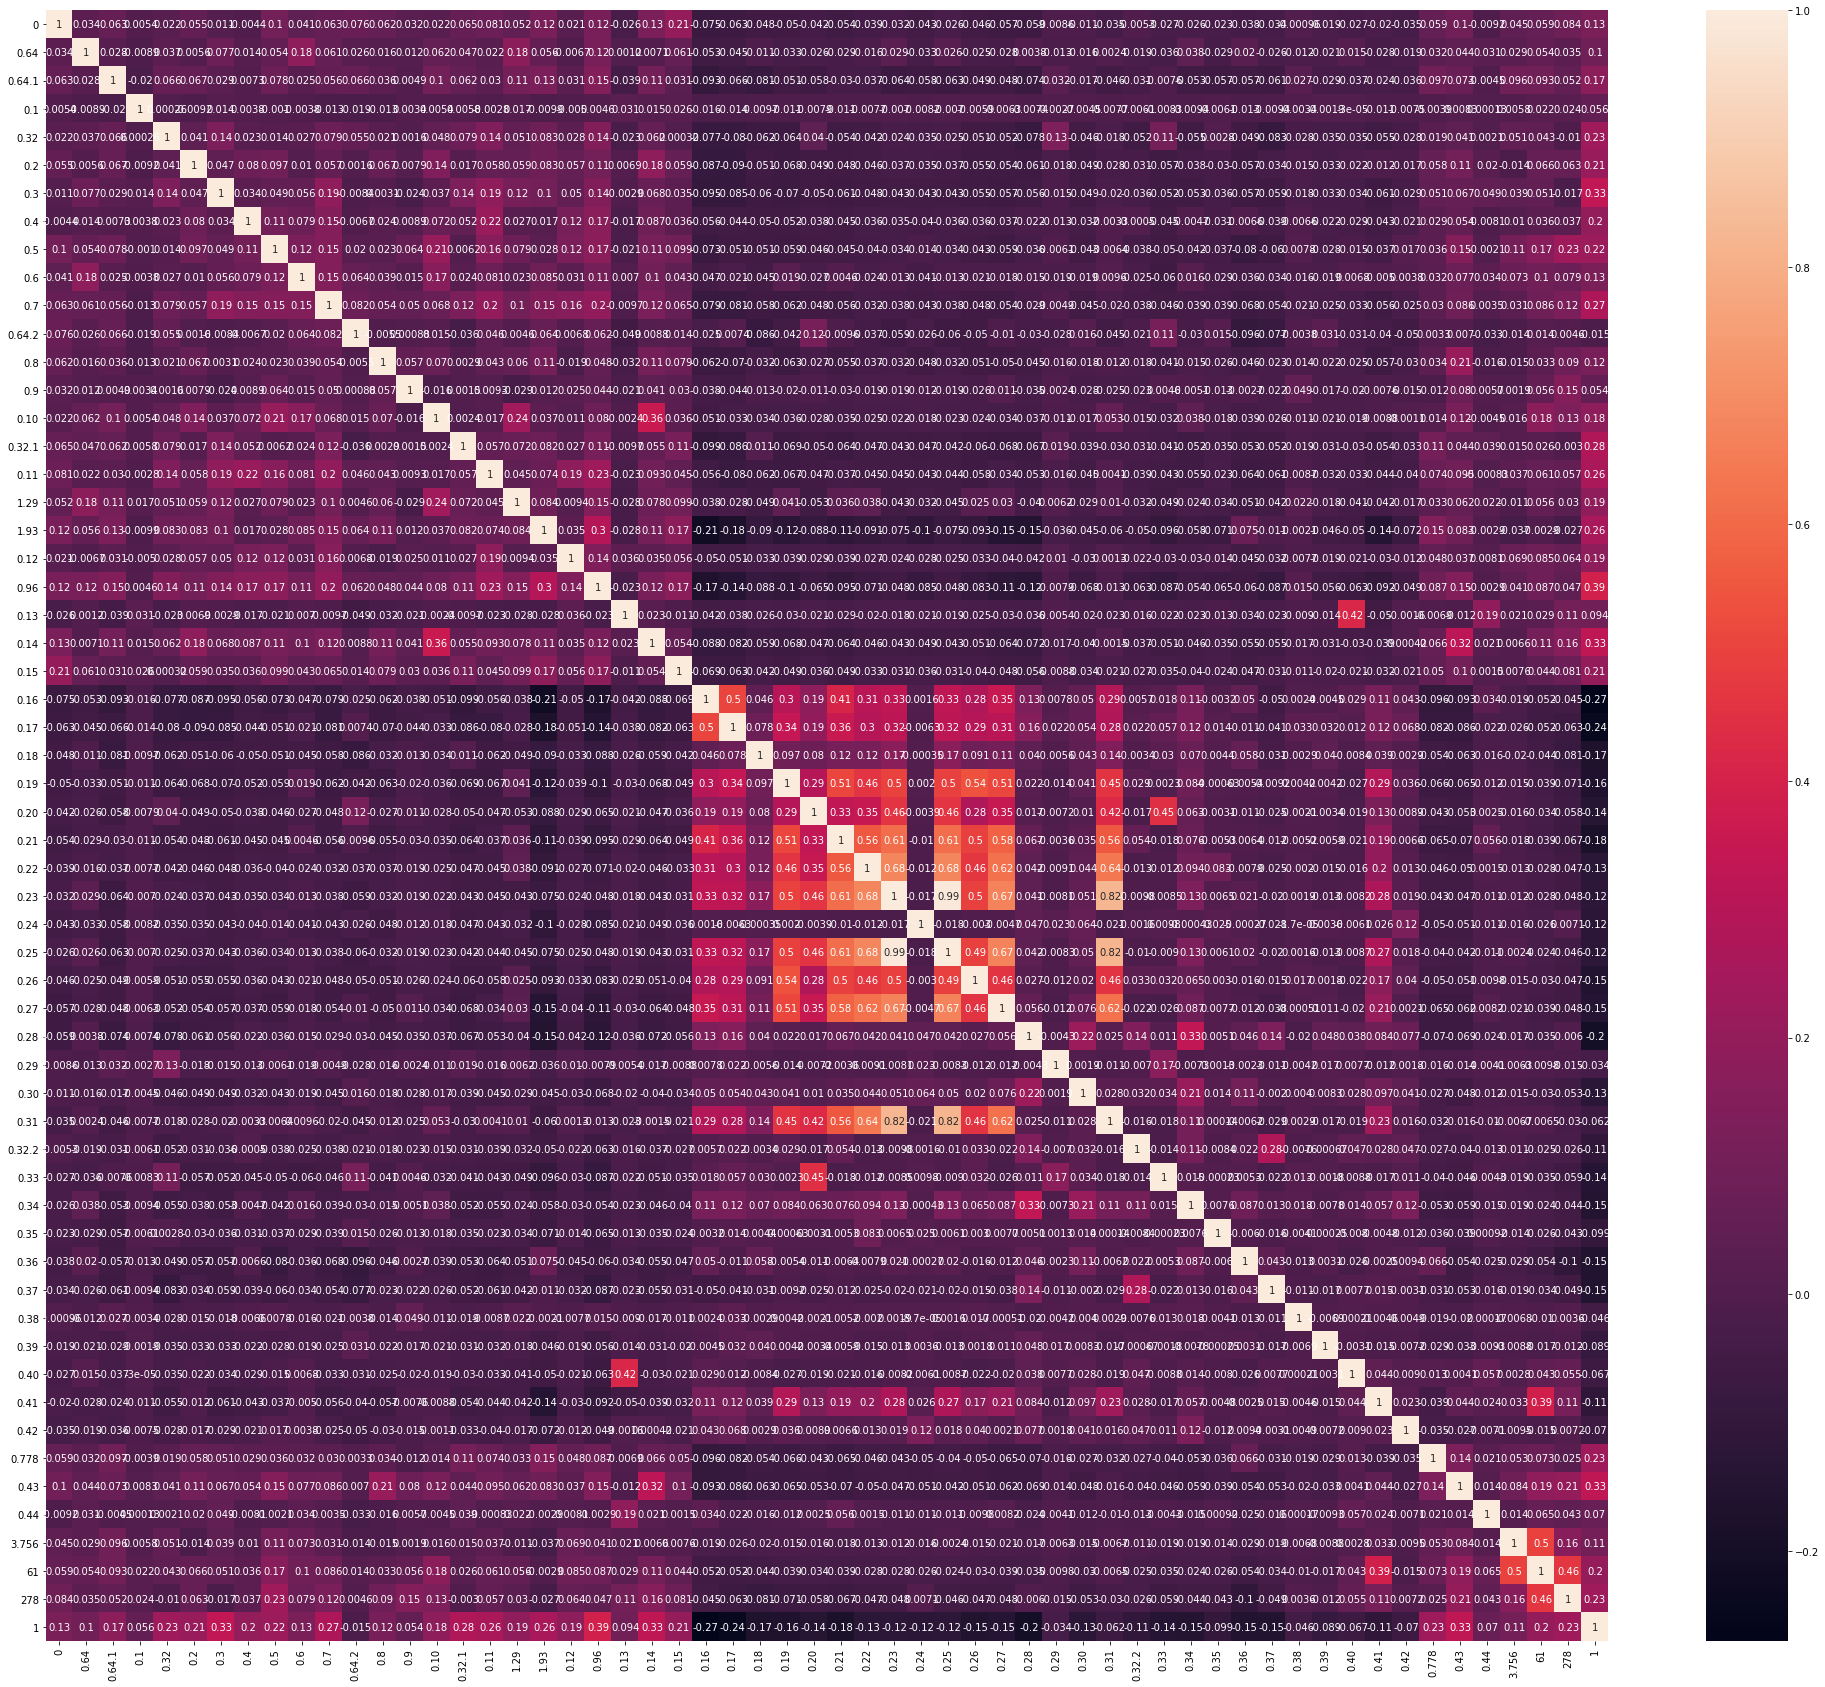

In [96]:
# Plotting a heatmap to show how the columns are correlated
#

plt.figure(figsize = (35,30))

sns.heatmap(new_df.corr(), annot = True)

plt.show()

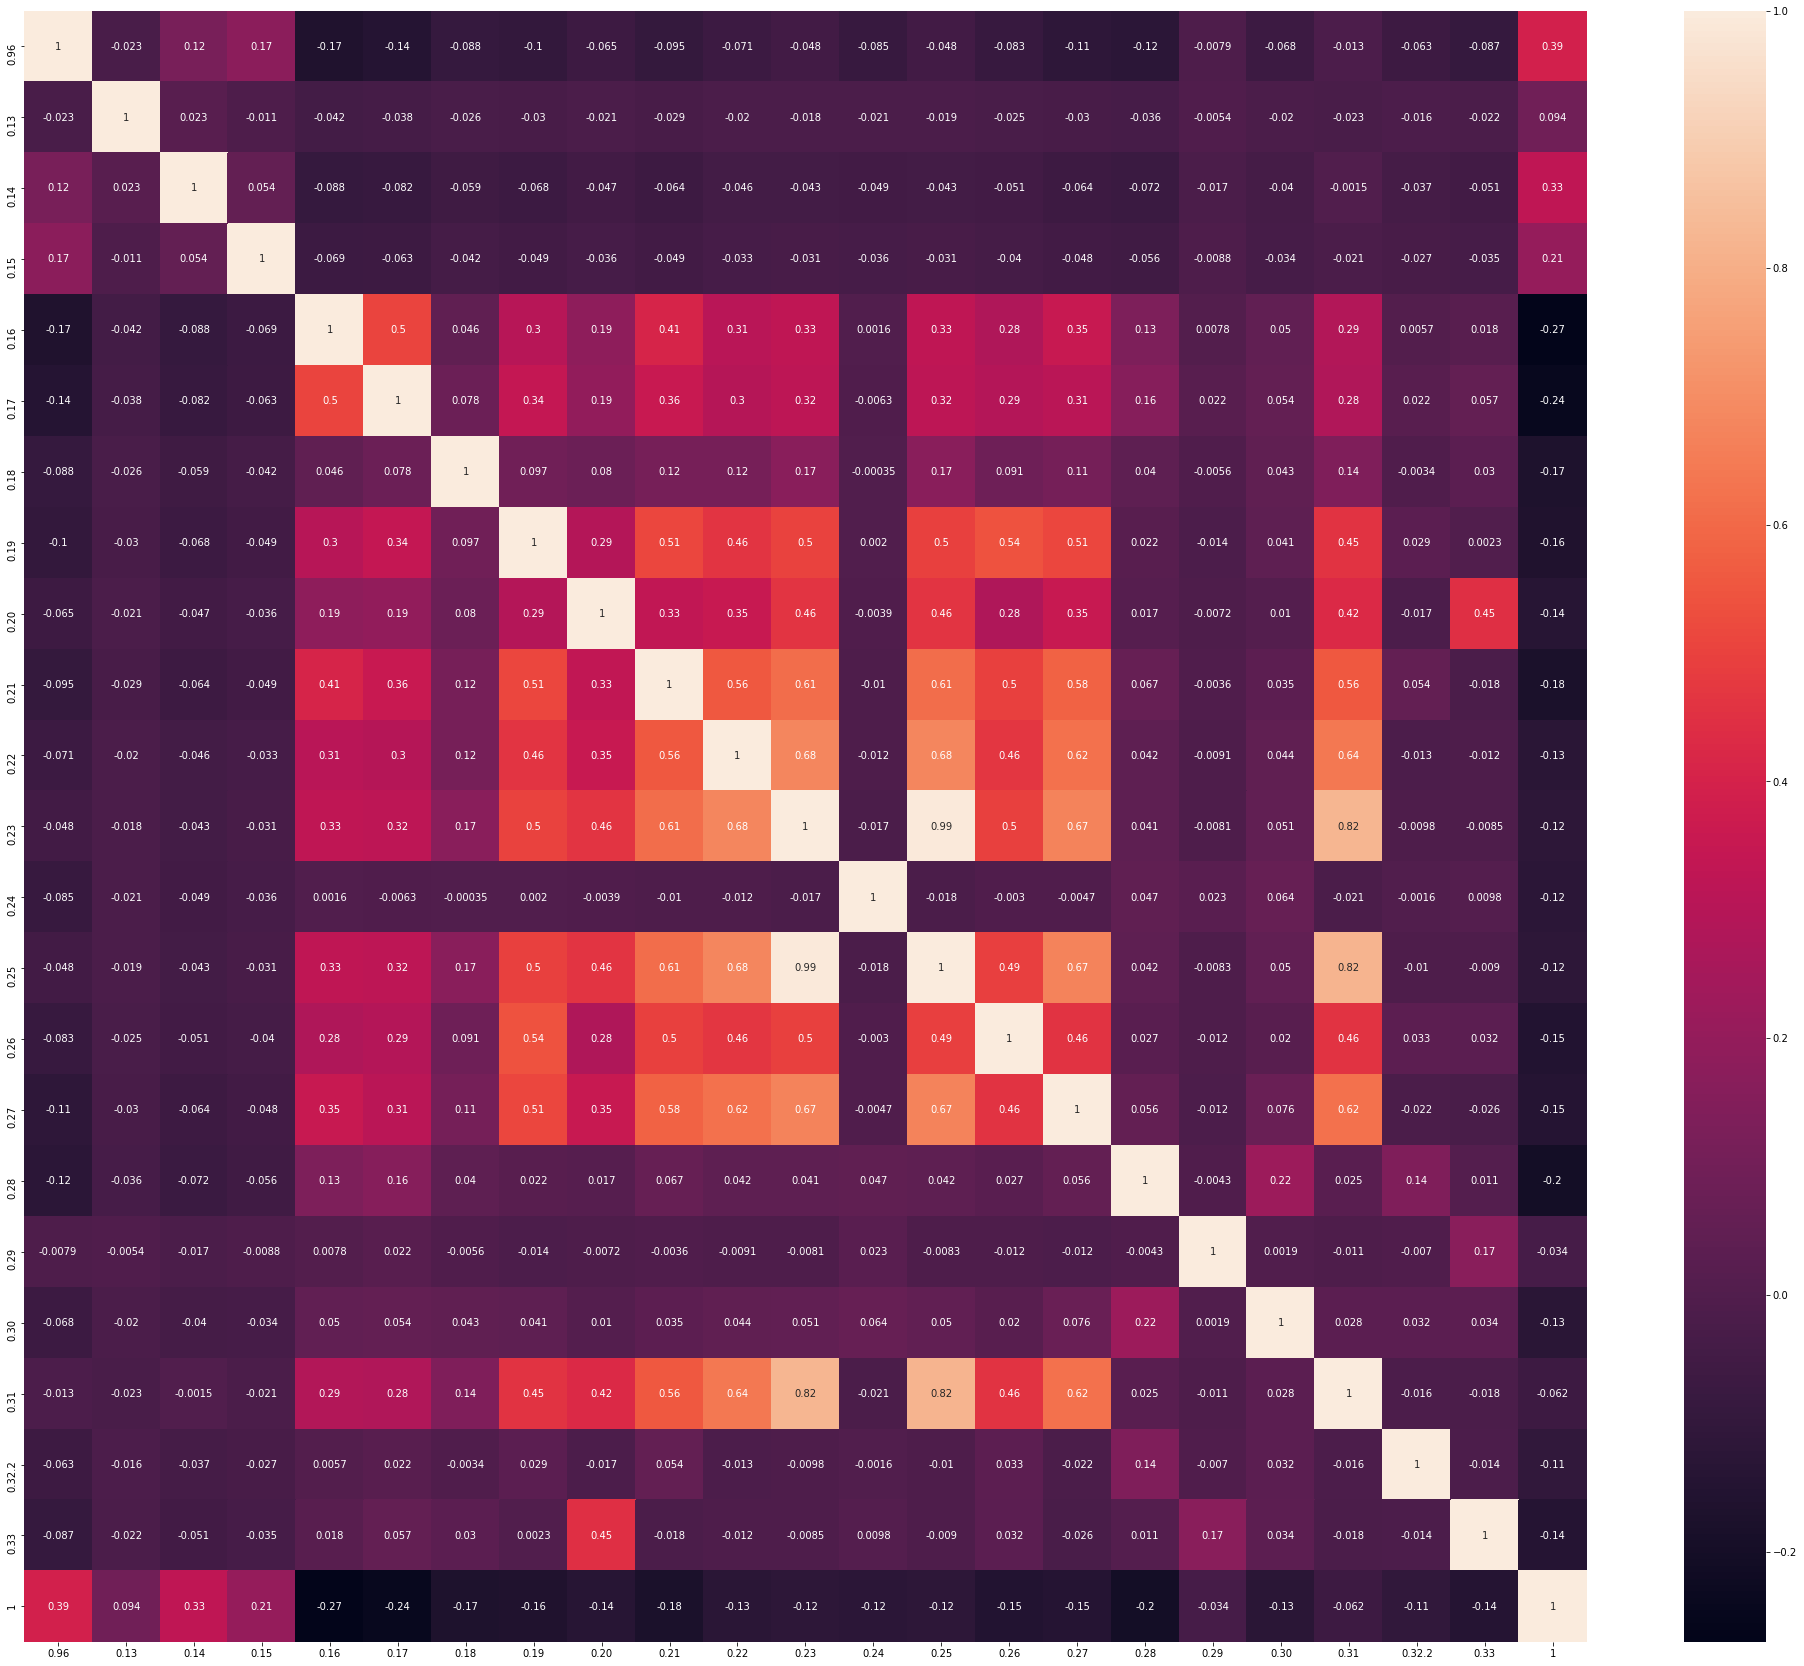

In [97]:
# Plotting a heatmap for the columns that show a higher correlation for easy analysis

columns = new_df[['0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33','1']]

plt.figure(figsize = (35,30))

sns.heatmap(columns.corr(), annot = True)

plt.show()

In [99]:
# Data Reduction
# Checking for multicollinearity on the independent variables only
#
independent = new_df.drop('1', 1)
correlations = independent.corr()
correlations

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278
0,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,0.063007,0.075919,0.061960,0.032249,0.022439,0.065451,0.081447,0.051765,0.120575,0.020910,0.121471,-0.025585,0.126457,0.205676,-0.075085,-0.063494,-0.048104,-0.050075,-0.041556,-0.054262,-0.038913,-0.031647,-0.042731,-0.026335,-0.046101,-0.057318,-0.058801,-0.008632,-0.011215,-0.035484,-0.005291,-0.026562,-0.025621,-0.022991,-0.037874,-0.034472,-0.000956,-0.018914,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126
0.64,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,0.060819,0.026228,0.015628,0.012465,0.061887,0.046615,0.022112,0.178408,0.055852,-0.006690,0.117780,0.001249,0.007145,0.061350,-0.053488,-0.044550,-0.011172,-0.032939,-0.026005,-0.029359,-0.015895,0.028897,-0.032530,0.026085,-0.025472,-0.028196,0.003843,-0.012693,-0.016159,0.002379,-0.019317,-0.035865,0.037745,-0.029024,0.020116,-0.025952,-0.012319,-0.020919,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601
0.64.1,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,0.055700,0.065723,0.036484,0.004928,0.104609,0.061927,0.029889,0.110528,0.126490,0.030903,0.147883,-0.039446,0.106747,0.031186,-0.092635,-0.066418,-0.081269,-0.051435,-0.057823,-0.030483,-0.036585,-0.063558,-0.057977,-0.063396,-0.048938,-0.047555,-0.074279,0.031767,-0.017389,-0.045985,-0.030803,-0.007592,-0.052705,-0.056865,-0.056554,-0.060529,0.027397,-0.029448,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967
0.1,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,-0.013195,-0.018576,-0.013156,0.003377,0.005373,0.005799,-0.002831,0.016592,-0.009932,-0.005008,0.004578,0.030587,0.014712,0.025849,-0.015706,-0.014033,-0.009712,-0.010632,-0.007933,-0.010914,-0.007656,-0.006969,-0.008248,-0.006977,-0.005909,-0.006312,-0.007440,-0.002724,-0.004508,-0.007656,-0.006076,-0.008320,-0.009387,-0.006115,-0.013182,-0.009434,-0.003410,-0.001862,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784
0.32,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,0.079165,0.055008,0.020656,0.001586,0.048309,0.079199,0.137869,0.050814,0.083092,0.027838,0.142992,-0.022716,0.062136,0.000320,-0.076785,-0.079809,-0.062483,-0.064151,0.039627,-0.053614,-0.042054,-0.024256,-0.034750,-0.024556,-0.051059,-0.052211,-0.077684,0.133057,-0.045513,-0.017580,-0.052325,0.107706,-0.054583,0.002770,-0.049499,-0.083315,-0.028146,-0.035040,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498
0.2,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,0.056568,0.001589,0.067254,0.007918,0.139996,0.016688,0.057658,0.059395,0.083323,0.057489,0.105705,0.006859,0.181734,0.059413,-0.086713,-0.089548,-0.050829,-0.067792,-0.048913,-0.048282,-0.046362,-0.036538,-0.035047,-0.037102,-0.055412,-0.054320,-0.060639,-0.018425,-0.049239,-0.027739,-0.030909,-0.056557,-0.037628,-0.030185,-0.057496,-0.034381,-0.014747,-0.033488,-0.021758,-0.011628,-0.016743,0.058173,0.105903,0.020405,-0.013559,0.065714,0.063402
0.3,0.011037,0.077468,0.028630,0.014286,0.135958,0.046844,1.000000,0.033675,0.049216,0.055670,0.186777,-0.008432,0.003143,-0.023831,0.037425,0.135882,0.189635,0.115648,0.102598,0.049664,0.143781,-0.002944,0.068424,0.034532,-0.095021,-0.084690,-0.060474,-0.070284,-0.050273,-0.061318,-0.047909,-0.042713,-0.043030,-0.043152,-0.055224,-0.057370,-0.055945,-0.015450,-0.049438,-0.019723,-0.035884,-0.052023,-0.053156,-0.036302,-0.057296,-0.05914

In [100]:
# Calculating the variance inflation factor(VIF) which is the inverse of the correlations
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278
0,1.101318,-0.004239,-0.015562,-0.000934,0.009140,-0.012811,0.035998,0.049797,-0.061124,-0.005105,-0.002372,-0.069769,-0.019429,-0.008085,0.054248,-0.031623,-0.052862,-0.024629,-0.047615,0.017761,-0.035860,0.021367,-0.106543,-0.181790,0.017760,0.005912,0.017026,0.000461,0.025063,0.018169,-0.004153,0.464727,0.018465,-0.540531,0.006122,0.026960,0.028488,0.000679,-0.016168,0.040053,-0.024390,-0.002417,-0.013151,0.006639,0.012678,0.015557,0.000047,0.005574,0.009480,-0.008375,0.021603,-0.017726,-0.015714,0.007477,-0.031306,0.009200,-0.038382
0.64,-0.004239,1.107739,0.003552,0.015602,-0.011684,0.015211,-0.039557,0.014512,-0.006418,-0.189410,0.001729,-0.026898,0.011197,-0.011150,0.007056,-0.013751,0.017331,-0.194697,0.021072,0.028121,-0.067843,0.012840,0.043022,-0.026486,0.025978,0.017127,-0.001713,0.027806,0.024307,0.048632,0.029988,-0.521734,0.012248,0.283682,0.005792,0.049941,-0.025299,0.011152,0.016365,0.074187,0.005907,0.007604,-0.042284,0.015785,-0.041138,0.012905,0.015826,0.013091,-0.028032,0.044663,0.017188,-0.005444,-0.017735,-0.028133,0.001233,-0.037837,-0.005492
0.64.1,-0.015562,0.003552,1.094231,0.023946,-0.019610,-0.020679,0.024928,0.028312,-0.023688,0.023085,0.001603,-0.045843,-0.004508,0.009531,-0.059081,-0.030527,0.027085,-0.063373,-0.071550,-0.003120,-0.088690,0.039744,-0.050935,0.027926,0.050273,0.003056,0.052373,0.007968,0.050852,-0.056235,-0.028845,-0.080148,0.039020,0.113510,0.017953,-0.019272,0.023034,-0.033010,-0.015304,0.023660,-0.000155,-0.029437,0.017630,0.046794,0.041729,0.044965,-0.029663,0.017754,0.009806,-0.009504,0.012875,-0.065790,0.002370,0.006370,-0.091010,-0.009261,-0.007157
0.1,-0.000934,0.015602,0.023946,1.006486,0.000999,0.015999,-0.012396,-0.003806,0.008484,0.001788,0.019929,0.017821,0.020074,-0.001238,0.004596,0.000791,0.005126,-0.019528,0.017491,0.009127,-0.002072,-0.030799,-0.013729,-0.026021,0.012783,0.006837,0.010549,0.003169,-0.001695,0.003482,0.002935,-0.030103,0.010095,0.011571,-0.000024,0.000205,-0.000148,0.001616,-0.003635,0.007600,0.001244,0.006981,0.004306,0.007535,0.011028,0.011280,0.003588,0.002553,0.015129,0.027086,0.007355,0.005273,-0.002551,0.008446,0.011912,-0.036237,-0.010700
0.32,0.009140,-0.011684,-0.019610,0.000999,1.111601,-0.014704,-0.088853,0.023082,0.039627,0.002764,-0.015693,-0.024127,-0.002326,0.000212,-0.031276,-0.043993,-0.107244,-0.014994,-0.033370,0.015132,-0.086262,0.018952,-0.020020,0.040569,0.019013,0.039224,0.045952,0.015230,-0.029474,0.013439,0.018748,-0.128505,0.017747,0.054021,0.016366,0.016861,0.018957,-0.134254,0.016761,0.011322,0.010970,-0.104789,0.021749,-0.018429,0.028573,0.063019,0.029509,0.024769,0.010945,0.033289,0.003188,0.019756,0.001235,0.001455,-0.039848,-0.032380,0.036211
0.2,-0.012811,0.015211,-0.020679,0.015999,-0.014704,1.077883,-0.009177,-0.048185,-0.043102,0.039852,0.004232,0.010390,-0.027550,0.009535,-0.075615,0.023642,0.003450,-0.011146,-0.023626,-0.030008,-0.029525,-0.005957,-0.120660,-0.020201,0.027474,0.036334,0.020147,0.023721,0.004628,-0.016035,0.009663,-0.103090,0.015587,0.048775,0.016348,0.006016,0.011492,0.010855,0.022483,0.034810,0.010891,0.033009,0.002774,0.016135,0.041886,0.016910,0.011801,0.019490,0.015654,-0.007770,0.001345,-0.028307,-0.021141,-0.015918,0.051604,-0.040074,0.007348
0.3,0.035998,-0.039557,0.024928,-0.012396,-0.088853,-0.009177,1.131429,0.046819,0.008428,-0.006597,-0.141444,0.039813,0.035668,0.030244,0.012526,-0.087180,-0.151294,-0.079081,-0.025479,0.013598,-0.031925,0.002950,-0.015808,0.008815,0.043484,0.008460,0.040745,0.018607,0.001447,0.024162,0.012782,-0.110626,0.018829,0.084384,0.007723,0.012020,-0.003087,0.022065,0.011484,-0.030090,-0.002553,0.035919,0.018900,0.026200,0.037632,0.043867,0.011219,0.018082,0.021770,0.047948,0.00748

In [101]:
# Columns 0.23 and 0.25 have a VIF of greater than 10 which would pose a problem for our analysis, therefore we are going to drop them.
# 0.23 has 102.289489 and 0.25 has 99.424351
#
new_df = new_df.drop(['0.23','0.25'], axis = 1)
new_df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.24,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


## 7. Implementing the Solution

In [103]:
# Wefirst going to get the summary statistics of our whole dataset
#
new_df.describe()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.24,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.00000,4209.000000
mean,0.104391,0.112530,0.291390,0.063093,0.325322,0.096679,0.117503,0.108026,0.091882,0.248479,0.056700,0.565187,0.097679,0.061226,0.044813,0.253813,0.149190,0.188494,1.718318,0.084982,0.810005,0.131618,0.100646,0.090991,0.574132,0.279397,0.369926,0.128605,0.098406,0.103804,0.063559,0.102357,0.107907,0.099392,0.143516,0.014193,0.084077,0.061292,0.041442,0.141575,0.048784,0.085286,0.320200,0.189420,0.005788,0.034754,0.040413,0.144082,0.017380,0.281018,0.076075,0.045809,5.384282,52.137800,291.18508,0.398670
std,0.300036,0.454241,0.515752,1.352647,0.687887,0.276059,0.397327,0.410328,0.282174,0.656705,0.184186,0.882617,0.309342,0.346106,0.242214,0.797629,0.457718,0.540931,1.768967,0.505641,1.149486,1.071384,0.351375,0.431772,1.676715,0.905650,1.775532,0.535489,0.576863,0.439618,0.387312,0.569211,0.530323,0.386513,0.424553,0.230539,0.448043,0.319556,0.318214,0.793895,0.231898,0.646171,1.046027,0.928413,0.079180,0.298556,0.252562,0.274280,0.105743,0.843387,0.239734,0.435976,33.151287,199.605834,618.72831,0.489683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627000,7.000000,40.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.00000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,0.000000,0.830000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,2.720000,0.000000,1.280000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706000,44.000000,273.00000,1

In [104]:
# Implementing the Solution
# First we are going to split our data into test and target features
# 

X = new_df.drop("1",1).values
y = new_df['1'].values

# We are going to use the last column 1, where 0 will represent the email as spam and 1 represents not spam

In [105]:
# We then split our data into training and test sets
# We are going to split in the ratio 80:20 respectively
#
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [106]:
# We are now doing to scale our data using the StandardScaler

# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Gaussian Naive Bayes Classifier

In [107]:
# Training our model using the Gaussian Naive Bayes Classifier
#

from sklearn.naive_bayes import GaussianNB

model  = GaussianNB()
model = model.fit(X_train, y_train)


In [108]:
# Making predictions using our model
#
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,

In [109]:
# We create  comparison dataframe to see how the actual and predicted values differ
#

comparison_df = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})
comparison_df.head(10)

,Actual,Predicted
0,0,0
1,0,0
2,0,1
3,1,1
4,0,0
5,0,1
6,0,0
7,1,1
8,0,0
9,0,0


In [110]:
#Summary statistics of the comparison dataframe
#
comparison_df.describe()

,Actual,Predicted
count,842.000000,842.000000
mean,0.412114,0.560570
std,0.492508,0.496613
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [111]:
# Evaluating the error performance of the model

from sklearn import metrics

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

# The RMSE is quite high which means that our model did not perform so well.

Mean Absolute Error: 0.17695961995249407
Mean Squared Error: 0.17695961995249407
Root Mean Squared Error: 0.4206656866830168


In [112]:
# Evaluating the model performance
#
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

# Out the 495 actual 0(spam) emails, 137 were predicted to 1(not spam)
# Out of the 347 actual 1(not spam) emails, 12 were predicted to be 0(spam)
# Our Gaussiamn model was 82% accurate.

[[358 137]
 [ 12 335]]
              precision    recall  f1-score   support

           0       0.97      0.72      0.83       495
           1       0.71      0.97      0.82       347

    accuracy                           0.82       842
   macro avg       0.84      0.84      0.82       842
weighted avg       0.86      0.82      0.82       842



In [63]:
# Accuracy

model.score(X_train, y_train)

0.8330858330858331

## 8. Challenging the solution

In [64]:
# Reviewing the Solution 
#

## 9. Follow up questions

### a). Did we have the right data?
> Yes

### b). Do we need other data to answer our question?
> No

### c). Did we have the right question?
> Yes